In [314]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


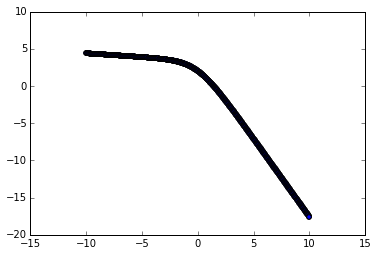

In [315]:
alph=0.1
bet=2
log_R_c=np.log(1)
log_rho0=np.log(30)
r=linspace(-10,10,1000)
def densities(alph,bet,log_R_c,log_rho0,r):
    rho=np.exp(log_rho0)/(((np.exp(r)/np.exp(log_R_c))**alph)*((1+np.exp(r)/np.exp(log_R_c))**bet))
    return (rho)
         
densdata=densities(alph,bet,log_R_c,log_rho0,r)
scatter(r,np.log(densdata))

    

In [316]:
def loglikelihood(y_obs, y_model):
    chi_squared = (1.0/2.0)*sum((y_obs-y_model)**2)
    return (-chi_squared)

In [353]:
densmodel=[]

alph_walk = empty((0))
bet_walk = empty((0))
log_R_c_walk = empty((0))
log_rho0_walk = empty((0))
logl_walk = empty((0))

alph0=0.19
bet0=2.12
log_R_c0=np.log(1.099)
log_rho00=np.log(31)

alph_walk = append(alph_walk, alph0)
bet_walk = append(bet_walk, bet0)
log_R_c_walk = append(log_R_c_walk, log_R_c0)
log_rho0_walk = append(log_rho0_walk, log_rho00)


densmodel = densities(alph_walk[0],bet_walk[0],log_R_c_walk[0],log_rho0_walk[0],r)
logl_walk = append(logl_walk, loglikelihood(densdata, densmodel))
print 'Los parámetros iniciales fueron'
print 'alph0='+str(alph_walk[0])
print 'bet0='+str(bet_walk[0])
print 'R_c0='+str(log_R_c_walk[0])
print 'rho00='+str(log_rho0_walk[0])

print 'El logaritmo de la función de likelihood es='+str(logl_walk[0])


Los parámetros iniciales fueron
alph0=0.19
bet0=2.12
R_c0=0.0944006754215
rho00=3.43398720449
El logaritmo de la función de likelihood es=-777747.752064


In [354]:
n_iterations = 10000
densprime=[]
for i in range(n_iterations):
    alph0_prime = np.random.normal(alph_walk[i], 1) 
    bet0_prime = np.random.normal(bet_walk[i], 1) 
    log_R_c0_prime = np.random.normal(log_R_c_walk[i], 1) 
    log_rho00_prime = np.random.normal(log_rho0_walk[i], 1) 
    
    
    densmodel = densities(alph_walk[i],bet_walk[i],log_R_c_walk[i],log_rho0_walk[i],r)
    densprime = densities(alph0_prime,bet0_prime,log_R_c0_prime,log_rho00_prime,r)
    
    logl_prime = loglikelihood(densdata, densprime)
    logl_init = loglikelihood(densdata, densmodel)
    
    alpha = exp(logl_prime-logl_init)
    if(alpha>=1.0):
        alph_walk  = append(alph_walk,alph0_prime)
        bet_walk  = append(bet_walk,bet0_prime)
        log_R_c_walk  = append(log_R_c_walk,log_R_c0_prime)
        log_rho0_walk = append(log_rho0_walk,log_rho00_prime)
    
        logl_walk = append(logl_walk, logl_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            alph_walk  = append(alph_walk,alph0_prime)
            bet_walk  = append(bet_walk,bet0_prime)
            log_R_c_walk  = append(log_R_c_walk,log_R_c0_prime)
            log_rho0_walk = append(log_rho0_walk,log_rho00_prime)
         
            logl_walk = append(logl_walk, logl_prime)
        else:
            alph_walk  = append(alph_walk,alph_walk[i])
            bet_walk  = append(bet_walk,bet_walk[i])
            log_R_c_walk  = append(log_R_c_walk,log_R_c_walk[i])
            log_rho0_walk = append(log_rho0_walk,log_rho0_walk[i])
      
            logl_walk = append(logl_walk, logl_init)

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp


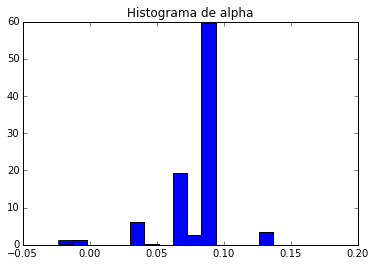

In [355]:
count, bins, ignored =plt.hist(alph_walk, 20, normed=True)
plt.title('Histograma de alpha', fontsize=12)

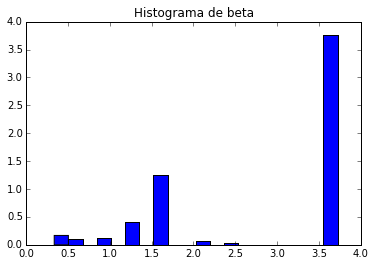

In [356]:
count, bins, ignored =plt.hist(bet_walk, 20, normed=True)
plt.title('Histograma de beta', fontsize=12)

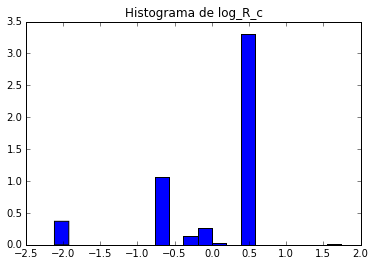

In [357]:
count, bins, ignored =plt.hist(log_R_c_walk, 20, normed=True)
plt.title('Histograma de log_R_c', fontsize=12)

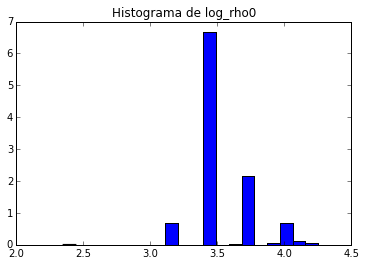

In [358]:
count, bins, ignored =plt.hist(log_rho0_walk, 20, normed=True)
plt.title('Histograma de log_rho0', fontsize=12)

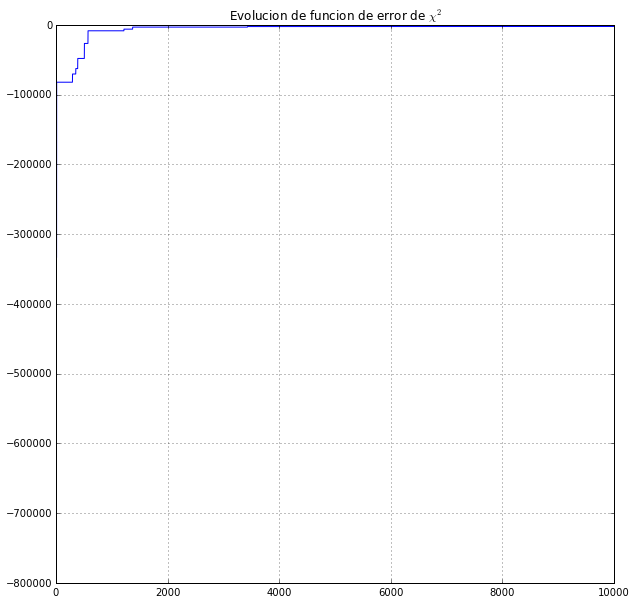

In [359]:
Plot2=plt.figure(figsize=(10,10))
plot((logl_walk))
plt.title('Evolucion de funcion de error de $\chi^{2}$', fontsize=12)
plt.grid()

In [360]:
max_likelihood_id = argmax(logl_walk)
best_alph = alph_walk[max_likelihood_id]
best_bet = bet_walk[max_likelihood_id]
best_log_R_c = log_R_c_walk[max_likelihood_id]
best_log_rho0 = log_rho0_walk[max_likelihood_id]

print 'Los parámetros más probables encontrados fueron'
print 'alph='+str(best_alph)
print 'bet='+str(best_bet)
print 'log_R_c='+str(best_log_R_c)
print 'log_rho0='+str(best_log_rho0)

print '\nLos parámetros originales fueron'
print 'alph='+str(alph)
print 'bet='+str(bet)
print 'log_R_c='+str(log_R_c)
print 'log_rho0='+str(log_rho0)



Los parámetros más probables encontrados fueron
alph=0.0895254668694
bet=3.72183296673
log_R_c=0.535565066536
log_rho0=3.48363311382

Los parámetros originales fueron
alph=0.1
bet=2
log_R_c=0.0
log_rho0=3.40119738166


/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


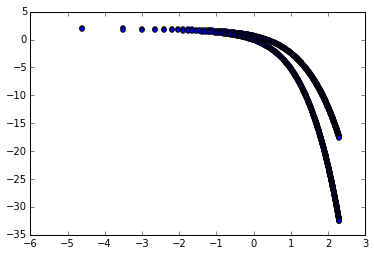

In [361]:
denstest=[]
denstest=densities(best_alph,best_bet,best_log_R_c,best_log_rho0,r)
densdata=densities(alph,bet,log_R_c,log_rho0,r)
scatter(np.log(r),np.log(densdata))
scatter(np.log(r),np.log(denstest))